In [ ]:
import sys
import sklearn
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import random

#Extracting the column names from website

In [ ]:
colnames = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","una1","una2","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","result"]
# len(colnames)

#Get the data

In [ ]:
import pandas as pd
from zipfile import ZipFile
from urllib.request import urlopen
import io

f = urlopen('https://raw.githubusercontent.com/AkshatGarg7/DDOS-Detection-using-Machine-Learning/master/Dataset/dataset.zip').read()
zip_file = ZipFile(io.BytesIO(f))

train_df = pd.read_csv(zip_file.open('kddcup.csv'),header = None,names = colnames)
print("train_df shape -> ",train_df.shape)
test_df = pd.read_csv(zip_file.open('corrected.csv'),header = None,names = colnames)
print("test_df shape -> ",test_df.shape)

train_df shape ->  (494021, 42)
test_df shape ->  (311029, 42)


#Data Manpulation and Analysis using Pandas framework

In [ ]:
frames = [train_df,test_df]
df = pd.concat(frames)
print("df shape -> ",df.shape)

df shape ->  (805050, 42)


In [ ]:
# df.drop_duplicates(subset=colnames, keep='first', inplace = True)

In [ ]:
df.head()

duration protocol_type  ... dst_host_srv_rerror_rate   result
0         0           tcp  ...                      0.0  normal.
1         0           tcp  ...                      0.0  normal.
2         0           tcp  ...                      0.0  normal.
3         0           tcp  ...                      0.0  normal.
4         0           tcp  ...                      0.0  normal.

[5 rows x 42 columns]

In [ ]:
df.describe()

duration  ...  dst_host_srv_rerror_rate
count  805050.000000  ...             805050.000000
mean       36.359298  ...                  0.089974
std       609.751312  ...                  0.283886
min         0.000000  ...                  0.000000
25%         0.000000  ...                  0.000000
50%         0.000000  ...                  0.000000
75%         0.000000  ...                  0.000000
max     58329.000000  ...                  1.000000

[8 rows x 38 columns]

In [ ]:
df.isnull().sum() 
#so no data is null in df

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
una1                           0
una2      

In [ ]:
pd.Series(df.protocol_type.value_counts(ascending=True))

udp      47057
tcp     309422
icmp    448571
Name: protocol_type, dtype: int64

In [ ]:
pd.Series(df.result.value_counts(ascending=True))

worm.                    2
spy.                     2
sqlattack.               2
udpstorm.                2
xsnoop.                  4
perl.                    5
phf.                     6
xlock.                   9
ftp_write.              11
loadmodule.             11
xterm.                  13
imap.                   13
ps.                     16
sendmail.               17
named.                  17
rootkit.                23
multihop.               25
land.                   30
buffer_overflow.        52
httptunnel.            158
nmap.                  315
pod.                   351
saint.                 736
processtable.          759
apache2.               794
teardrop.              991
warezclient.          1020
mscan.                1053
portsweep.            1394
ipsweep.              1553
warezmaster.          1622
snmpguess.            2406
satan.                3222
back.                 3301
guess_passwd.         4420
mailbomb.             5000
snmpgetattack.        7741
n

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# number = LabelEncoder()

# df['protocol_type'] = number.fit_transform(df['protocol_type'])
# df['service'] = number.fit_transform(df['service'])
# df['flag'] = number.fit_transform(df['flag'])

# df["result"] = np.where(df.result == "normal.",1,0)
# pd.Series(df.result.value_counts(ascending=True))

In [ ]:
features = ["duration","src_bytes","wrong_fragment","count","urgent","num_compromised","srv_count"]
target = "result"

In [ ]:
df["result"] = np.where(df.result == "normal.","normal","attack")
pd.Series(df.result.value_counts(ascending=True))

normal    157871
attack    647179
Name: result, dtype: int64

In [ ]:
df['result'].value_counts() / df.shape[0]

0    0.803899
1    0.196101
Name: result, dtype: float64

<function matplotlib.pyplot.show>

<Figure size 432x288 with 0 Axes>

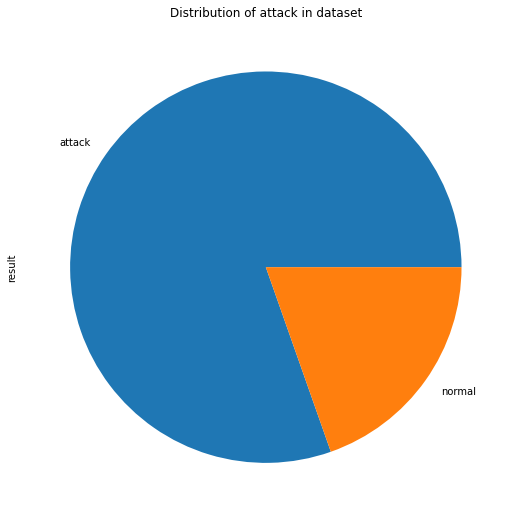

In [ ]:
plt.clf()
plt.figure(figsize = (9,9))
plt.title("Distribution of attack in dataset")
df['result'].value_counts().plot(kind = 'pie')
plt.show

In [ ]:
# def oversampling(df):
#   classes = df.result.value_counts().to_dict()
#   most = max(classes.values())
#   classes_list = []
#   for key in classes:
#     classes_list.append(df[df['result'] == key])
#   classes_sample = []
#   for i in range(1,len(classes_list)):
#     classes_sample.append(classes_list[i].sample(most,replace = True))
#   df_maybe = pd.concat(classes_sample)
#   final_df = pd.concat([df_maybe,classes_list[0]], axis=0)
#   final_df = final_df.reset_index(drop=True)
#   return final_df

In [ ]:
# df = oversampling(df)

In [ ]:
# pd.Series(df.result.value_counts(ascending=True))

In [ ]:
# pd.Series(df.protocol_type.value_counts(ascending=True))

In [ ]:
# def oversampling_proto(df):
#   classes = df.protocol_type.value_counts().to_dict()
#   most = max(classes.values())
#   classes_list = []
#   for key in classes:
#     classes_list.append(df[df['protocol_type'] == key])
#   classes_sample = []
#   for i in range(1,len(classes_list)):
#     classes_sample.append(classes_list[i].sample(most,replace = True))
#   df_maybe = pd.concat(classes_sample)
#   final_df = pd.concat([df_maybe,classes_list[0]], axis=0)
#   final_df = final_df.reset_index(drop=True)
#   return final_df

In [ ]:
# df = oversampling_proto(df)
pd.Series(df.protocol_type.value_counts(ascending=True))

icmp      3515
udp      16793
tcp     195293
Name: protocol_type, dtype: int64

In [ ]:
# pd.Series(df.result.value_counts(ascending=True))

In [ ]:
icmp_df = df[df.loc[:,"protocol_type"] == "icmp"]
pd.Series(icmp_df.result.value_counts(ascending=True))

1    1036
0    2479
Name: result, dtype: int64

In [ ]:
tcp_df = df[df.loc[:,"protocol_type"] == "tcp"]
pd.Series(tcp_df.result.value_counts(ascending=True))

0     75751
1    119542
Name: result, dtype: int64

In [ ]:
udp_df = df[df.loc[:,"protocol_type"] == "udp"]
pd.Series(udp_df.result.value_counts(ascending=True))

0     2035
1    14758
Name: result, dtype: int64

In [ ]:
# check version number
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek  
from sklearn.model_selection import train_test_split
from collections import Counter
def x_y(df_given):
  X = df_given.loc[:,features]
  y = df_given.loc[:,target]
  counter = Counter(y)
  print("before: ",counter)
  oversample = ADASYN(random_state = 1)
  X,y = oversample.fit_resample(X,y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)
  counter = Counter(y)
  print("after: ",counter)
  return X_train, X_test, y_train, y_test

In [ ]:
# # check version number
# from imblearn.over_sampling import SMOTE, ADASYN
# from imblearn.combine import SMOTEENN, SMOTETomek  
# from sklearn.model_selection import train_test_split

# # oversample = SMOTETomek(random_state = 1)
# oversample = ADASYN(random_state = 1)
# X,y = oversample.fit_resample(X,y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)
# counter = Counter(y)
# print("after: ",counter)

In [ ]:
# icmp_df = oversampling(icmp_df)
# pd.Series(icmp_df.result.value_counts(ascending=True))

In [ ]:
# tcp_df = df[df.loc[:,"protocol_type"] == "tcp"]
# pd.Series(tcp_df.result.value_counts(ascending=True))

In [ ]:
# udp_df = df[df.loc[:,"protocol_type"] == "udp"]
# pd.Series(udp_df.result.value_counts(ascending=True))

In [ ]:
# from sklearn.model_selection import train_test_split

# X = icmp_df.loc[:,features]
# y = icmp_df.loc[:,target]

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
models = [GussianNB(),LogisticRegression(),DecisionTreeClassifier(),SVC()]
classifiers = ["GussianNB","LR", "KNN","MLP","DecisionTree","SVM"]
scores = []

In [ ]:
def ml_model(X_train, X_test, y_train, y_test):
  for model in models:
      model.fit(X_train,y_train)
      y_pred = model.predict(X_test)
      score = accuracy_score(y_test, y_pred)*100
      scores.append(score)
      print("Accuracy of  model is: ", score)
      conf_matrix = confusion_matrix(y_test,y_pred)
      report = classification_report(y_test,y_pred)
      print("Confusion Matrix:\n",conf_matrix)
      print("Report:\n",report)
      print("\n==============***===============")

In [ ]:
X_train, X_test, y_train, y_test = x_y(icmp_df)
ml_model(X_train, X_test, y_train, y_test)

before:  Counter({0: 2479, 1: 1036})
after:  Counter({0: 2479, 1: 2476})
Accuracy of  model is:  74.71418964357768
Confusion Matrix:
 [[376 339]
 [ 37 735]]
Report:
               precision    recall  f1-score   support

           0       0.91      0.53      0.67       715
           1       0.68      0.95      0.80       772

    accuracy                           0.75      1487
   macro avg       0.80      0.74      0.73      1487
weighted avg       0.79      0.75      0.73      1487


==============***===============
Accuracy of  model is:  96.70477471418964
Confusion Matrix:
 [[676  39]
 [ 10 762]]
Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       715
           1       0.95      0.99      0.97       772

    accuracy                           0.97      1487
   macro avg       0.97      0.97      0.97      1487
weighted avg       0.97      0.97      0.97      1487


==============***===============
Accuracy of  model 

In [ ]:
# X_train, X_test, y_train, y_test = x_y(tcp_df)
# ml_model(X_train, X_test, y_train, y_test)

In [ ]:
# X_train, X_test, y_train, y_test = x_y(udp_df)
# ml_model(X_train, X_test, y_train, y_test)

In [ ]:
X_train, X_test, y_train, y_test = x_y(icmp_df)
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)



ml_model(X_train_norm, X_test_norm, y_train, y_test)

before:  Counter({0: 2479, 1: 1036})
after:  Counter({0: 2479, 1: 2476})
Accuracy of  model is:  76.73167451244116
Confusion Matrix:
 [[400 315]
 [ 31 741]]
Report:
               precision    recall  f1-score   support

           0       0.93      0.56      0.70       715
           1       0.70      0.96      0.81       772

    accuracy                           0.77      1487
   macro avg       0.81      0.76      0.75      1487
weighted avg       0.81      0.77      0.76      1487


==============***===============
Accuracy of  model is:  96.77202420981843
Confusion Matrix:
 [[681  34]
 [ 14 758]]
Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       715
           1       0.96      0.98      0.97       772

    accuracy                           0.97      1487
   macro avg       0.97      0.97      0.97      1487
weighted avg       0.97      0.97      0.97      1487


==============***===============


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy of  model is:  87.15534633490249
Confusion Matrix:
 [[532 183]
 [  8 764]]
Report:
               precision    recall  f1-score   support

           0       0.99      0.74      0.85       715
           1       0.81      0.99      0.89       772

    accuracy                           0.87      1487
   macro avg       0.90      0.87      0.87      1487
weighted avg       0.89      0.87      0.87      1487


==============***===============
Accuracy of  model is:  96.97377269670477
Confusion Matrix:
 [[675  40]
 [  5 767]]
Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.97       715
           1       0.95      0.99      0.97       772

    accuracy                           0.97      1487
   macro avg       0.97      0.97      0.97      1487
weighted avg       0.97      0.97      0.97      1487


==============***===============
Accuracy of  model is:  84.93611297915265
Confusion Matrix:
 [[505 210]
 [ 14 758]]
Report:


In [ ]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
# num_cols = ["duration","src_bytes","wrong_fragment","count","urgent","num_compromised","srv_count"]

# apply standardization on numerical features
for i in features:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

ml_model(X_train_stand, X_test_stand, y_train, y_test)

Accuracy of  model is:  75.05043712172159
Confusion Matrix:
 [[377 338]
 [ 33 739]]
Report:
               precision    recall  f1-score   support

           0       0.92      0.53      0.67       715
           1       0.69      0.96      0.80       772

    accuracy                           0.75      1487
   macro avg       0.80      0.74      0.73      1487
weighted avg       0.80      0.75      0.74      1487


==============***===============
Accuracy of  model is:  96.43577673167452
Confusion Matrix:
 [[678  37]
 [ 16 756]]
Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       715
           1       0.95      0.98      0.97       772

    accuracy                           0.96      1487
   macro avg       0.97      0.96      0.96      1487
weighted avg       0.96      0.96      0.96      1487


==============***===============


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy of  model is:  87.96234028244788
Confusion Matrix:
 [[542 173]
 [  6 766]]
Report:
               precision    recall  f1-score   support

           0       0.99      0.76      0.86       715
           1       0.82      0.99      0.90       772

    accuracy                           0.88      1487
   macro avg       0.90      0.88      0.88      1487
weighted avg       0.90      0.88      0.88      1487


==============***===============
Accuracy of  model is:  96.97377269670477
Confusion Matrix:
 [[675  40]
 [  5 767]]
Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.97       715
           1       0.95      0.99      0.97       772

    accuracy                           0.97      1487
   macro avg       0.97      0.97      0.97      1487
weighted avg       0.97      0.97      0.97      1487


==============***===============
Accuracy of  model is:  85.07061197041023
Confusion Matrix:
 [[505 210]
 [ 12 760]]
Report:


In [ ]:
X_train, X_test, y_train, y_test = x_y(df)
ml_model(X_train, X_test, y_train, y_test)

before:  Counter({1: 135336, 0: 80265})
after:  Counter({0: 136569, 1: 135336})
Accuracy of  model is:  74.90805668611779
Confusion Matrix:
 [[20785 20274]
 [  194 40319]]
Report:
               precision    recall  f1-score   support

           0       0.99      0.51      0.67     41059
           1       0.67      1.00      0.80     40513

    accuracy                           0.75     81572
   macro avg       0.83      0.75      0.73     81572
weighted avg       0.83      0.75      0.73     81572


==============***===============
Accuracy of  model is:  95.9961751581425
Confusion Matrix:
 [[40242   817]
 [ 2449 38064]]
Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     41059
           1       0.98      0.94      0.96     40513

    accuracy                           0.96     81572
   macro avg       0.96      0.96      0.96     81572
weighted avg       0.96      0.96      0.96     81572


==============***=============

In [ ]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
# num_cols = ["duration","src_bytes","wrong_fragment","count","urgent","num_compromised","srv_count"]

# apply standardization on numerical features
for i in features:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

ml_model(X_train_stand, X_test_stand, y_train, y_test)